# Lunch and learn: Machine learning (logistic regression)

### Goals of this notebook:
Demonstrate how to:
    1. Define the problem
    2. Load and explore the data
    3. Prepare / clean the data for modeling
    4. Train the model
    5. Evaluate the model
    6. Tune / improve the model
    7. Use the model to predict the probability of outcomes

### 1. Define the problem

The most important part of any ML problem is: **what puzzle(s) are we trying to solve?**

In this example, since we have data on bank marketing, some interesting questions might be:
- what indicators (x variables) have the biggest effect on whether a user will subscribe to a bank term deposit (y variable)?
- given that we have the variables required for the model for a given user, can we predict if the client will subscribe a bank term deposit (y variable)?

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 50

### 2. Load and explore the data

In [197]:
df_raw = pd.read_csv('./data/bank-marketing-data/bank-additional-full.csv', sep=';')
df = pd.read_csv('./data/bank-marketing-data/bank-additional-full.csv', sep=';')

Based on the dataset's [README](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing), we know that the data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Source: S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

Some caveats about this data:
- not all attributes are included due to privacy concerns

Data Sources: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014; S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
Number of Instances: 41188 for bank-additional-full.csv

Number of Attributes: 20 + output attribute.

## Input variables:
**bank client data:**   
1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

**related with the last contact of the current campaign:**
   
8 - contact: contact communication type (categorical: "cellular","telephone") 

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**social and economic context attributes**

16 - emp.var.rate: employment variation rate -quarterly indicator (numeric)

17 - cons.price.idx: consumer price index -monthly indicator (numeric)     

18 - cons.conf.idx: consumer confidence index -monthly indicator (numeric)     

19 - euribor3m: euribor 3 month rate -daily indicator (numeric)

20 - nr.employed: number of employees -quarterly indicator (numeric)

## Output variable (target variable):

21 - y: has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [198]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [208]:
print(df['y'].value_counts())

# A baseline model which always predicts 'no' will be correct 88.7% of the time. 
# Our model needs to be better than this!
no_count = float(df['y'].value_counts()['no'])
print(no_count/df.shape[0])

no     36548
yes     4640
Name: y, dtype: int64
0.887345828882


In [4]:
df.describe() 
# this will display only numerical variables. String variables are ommitted

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 2. data cleaning/wrangling

### Treating missing values
We can treat missing values in 3 ways:
    - Impute (i.e. estimate) its value based on its other values
    - Drop the entire row
    - Use the label for missing values (in this case, "unknown") as a variable (i.e. do nothing)

In [130]:
# removing rows with unknown
for column in df.columns:
    if (df[column].dtype == object): ## for columns that containing strings (dtype == object), remove rows with unknown
        df = df[df[column] != 'unknown']

### 4. Exploratory Data Analysis

In [17]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Preparing data for modelling

In [131]:
# Convert string data to numerical data so that scikitlearn can understand it
cols_to_transform = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
                    'poutcome', 'y']
df_with_dummies = pd.get_dummies(df, columns = cols_to_transform)

In [116]:
df_with_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [6]:
# Preparing the data into 2 sets: X and y variables

df_y = df_with_dummies[['y_yes']]
df_y.head()

,y_yes
0,0
2,0
3,0
4,0
6,0


In [7]:
del df_with_dummies['y_yes']
del df_with_dummies['y_no']
df_with_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [8]:
# convert pandas dataframe into numpy array
X = df_with_dummies.as_matrix()
y = df_y.as_matrix() # this step may not be necessary

In [ ]:
### 3. Train the model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
logisticregression = LogisticRegression().fit(X_train, y_train)
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.900245
test set score: 0.899370


In [21]:
logisticregression001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))

training set score: 0.900201
test set score: 0.901994


In [24]:
logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("training set score: %f" % logisticregression100.score(X_train, y_train))
print("test set score: %f" % logisticregression100.score(X_test, y_test))

training set score: 0.900157
test set score: 0.903175


In [32]:
C=[0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 10]

for c in C:
    print("training set score: %f" % LogisticRegression(C=c).fit(X_train, y_train).score(X_train, y_train))
    print("test set score: %f" % LogisticRegression(C=c).fit(X_train, y_train).score(X_test, y_test))

training set score: 0.900201
test set score: 0.901994
training set score: 0.900945
test set score: 0.898452
training set score: 0.900245
test set score: 0.899370
training set score: 0.900026
test set score: 0.899239
training set score: 0.900201
test set score: 0.901207
training set score: 0.900026
test set score: 0.903306
training set score: 0.900026
test set score: 0.899764
training set score: 0.900157
test set score: 0.903175
training set score: 0.900157
test set score: 0.903175
training set score: 0.900157
test set score: 0.903306
training set score: 0.900289
test set score: 0.899239
training set score: 0.900245
test set score: 0.903175
training set score: 0.900332
test set score: 0.899370
training set score: 0.900201
test set score: 0.901207


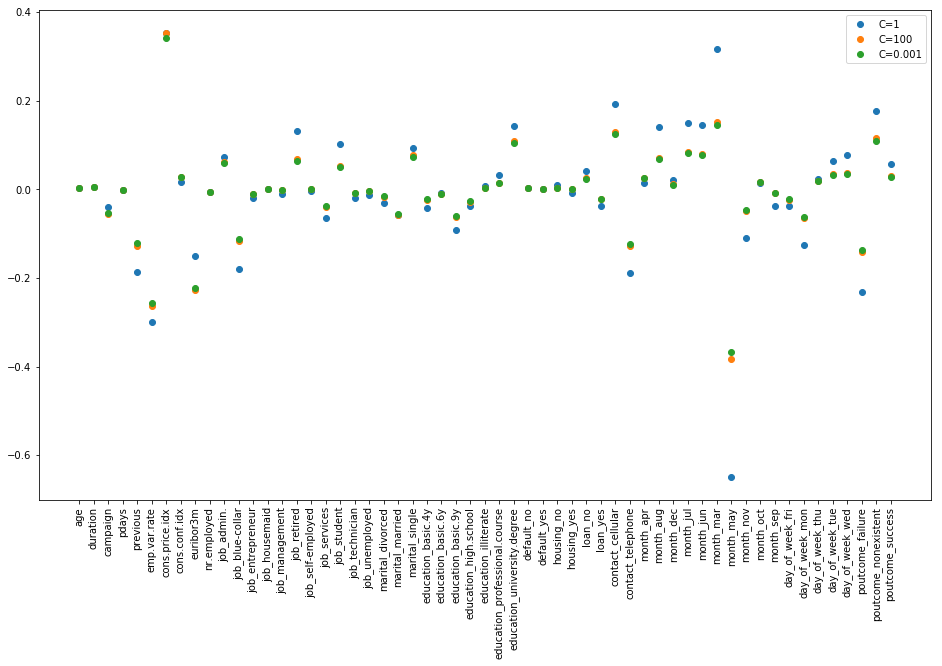

In [29]:
plt.figure(figsize=(16,9))

plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(X.shape[1]), df_with_dummies.columns, rotation=90)
# plt.ylim(-5, 5)
plt.legend()

In [12]:
logisticregression.coef_

array([[  2.93503642e-03,   4.48157447e-03,  -3.89492988e-02,
         -1.64868429e-03,  -1.86673798e-01,  -2.98576842e-01,
          3.52941036e-01,   1.73131936e-02,  -1.50564944e-01,
         -6.64708107e-03,   7.37816947e-02,  -1.79734089e-01,
         -2.01598290e-02,   1.87276087e-03,  -9.54591038e-03,
          1.31964302e-01,  -2.54120694e-03,  -6.49102059e-02,
          1.03445576e-01,  -1.87603463e-02,  -1.23778819e-02,
         -3.16743306e-02,  -5.81013537e-02,   9.28105489e-02,
         -4.19302259e-02,  -8.89641160e-03,  -9.07479338e-02,
         -3.71975286e-02,   6.87299391e-03,   3.28775991e-02,
          1.42056372e-01,   3.19827377e-03,  -1.63409161e-04,
          1.03108225e-02,  -7.27595784e-03,   4.11112002e-02,
         -3.80763356e-02,   1.92173017e-01,  -1.89138153e-01,
          1.43679190e-02,   1.41559137e-01,   2.16388101e-02,
          1.49059338e-01,   1.44311558e-01,   3.16457063e-01,
         -6.50224538e-01,  -1.10005391e-01,   1.37551429e-02,
        

### 4. Evaluate the model

In [19]:
from sklearn import metrics

In [22]:
expected = y_test
predicted = logisticregression.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      6662
          1       0.66      0.42      0.51       960

avg / total       0.89      0.90      0.89      7622



In [23]:
print(metrics.confusion_matrix(expected, predicted))

[[6455  207]
 [ 560  400]]


### Model 2: Macroeconomic indicators only

In [36]:
macroeconomic_variables = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
df_macroeconomic = df_raw[macroeconomic_variables]

In [37]:
df_macroeconomic.describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [38]:
y_2 = df_macroeconomic['y'].as_matrix() # this step may not be necessary

del df_macroeconomic['y']
X_2 = df_macroeconomic.as_matrix()

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=0)

In [42]:
logisticregression_macroeconomic = LogisticRegression().fit(X_train_2, y_train_2)
print("training set score: %f" % logisticregression_macroeconomic.score(X_train_2, y_train_2))
print("test set score: %f" % logisticregression_macroeconomic.score(X_test_2, y_test_2))

training set score: 0.887281
test set score: 0.887249


In [ ]:
## Macroeconomic indicators are worse predictors than the null model. Let's exclude it from our model.

### Model 3: User attributes only

In [110]:
macroeconomic_variables_without_y = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_without_macroeconomic = df_with_dummies

In [78]:
for var in macroeconomic_variables_without_y:
    del df_without_macroeconomic[var]

In [79]:
y_3 = df_without_macroeconomic['y_yes'].as_matrix() # this step may not be necessary

del df_without_macroeconomic['y_yes']
del df_without_macroeconomic['y_no']
X_3 = df_without_macroeconomic.as_matrix()

In [80]:
df_without_macroeconomic.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [81]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=0)

In [86]:
logisticregression_user_attributes_001 = LogisticRegression(C=0.01).fit(X_train_3, y_train_3)
logisticregression_user_attributes_1 = LogisticRegression(C=1).fit(X_train_3, y_train_3)
logisticregression_user_attributes_100 = LogisticRegression(C=100).fit(X_train_3, y_train_3)

print("training set score: %f" % logisticregression_user_attributes.score(X_train_3, y_train_3))
print("test set score: %f" % logisticregression_user_attributes.score(X_test_3, y_test_3))

training set score: 0.905021
test set score: 0.907449


In [ ]:
len(X_train_)

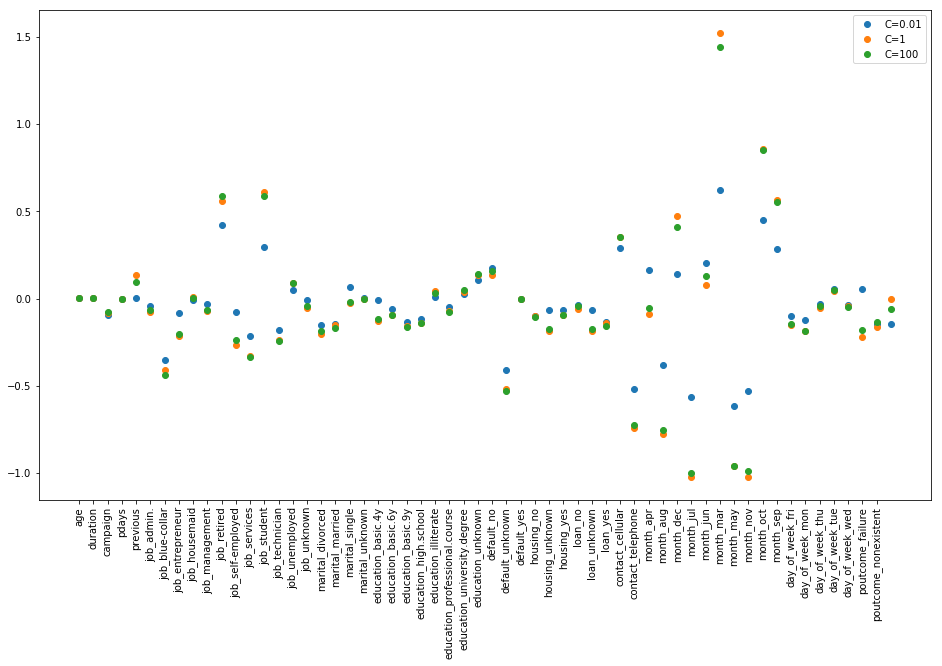

In [98]:
plt.figure(figsize=(16,9))

plt.plot(logisticregression_user_attributes_001.coef_.T, 'o', label="C=0.01")
plt.plot(logisticregression_user_attributes_1.coef_.T, 'o', label="C=1")
plt.plot(logisticregression_user_attributes_100.coef_.T, 'o', label="C=100")
plt.xticks(range(X.shape[1]), df_without_macroeconomic.columns, rotation=90)
# plt.ylim(-5, 5)
plt.legend()

# Note: the last value in the x-axis is 'poutcome_success'. For some reason, it is not showing.

In [105]:
# Evaluating our model
from sklearn import metrics

expected = y_3
predicted = logisticregression_user_attributes_1.predict(X_3)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
# confusion matrix is in this format: [[true_positive, false_negatives]]
#                                     [[false_positive, true_negative ]]

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     36548
          1       0.66      0.36      0.47      4640

avg / total       0.89      0.91      0.89     41188

[[35689   859]
 [ 2961  1679]]


In [106]:
# Accuracy score of our model
print(metrics.accuracy_score(expected, predicted))

0.907254540157


## Tuning hyper-parameters

In [173]:
from sklearn.model_selection import GridSearchCV

In [170]:
logisticregression_user_attributes_1.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [190]:
logisticregression_user_attributes = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
# using the default scoring of accuracy:
grid = GridSearchCV(estimator=logisticregression_user_attributes, param_grid=param_grid, cv=5)
grid.fit(X_train_3, y_train_3)

# print("training set score: ")
print(pd.DataFrame(grid.cv_results_))
# print("test set score: %f" % logisticregression_user_attributes_CV.score(X_test_3, y_test_3))

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       0.111408         0.001172         0.905247          0.905547    0.01   
1       0.128449         0.000780         0.905604          0.905725     0.1   
2       0.121107         0.000734         0.905863          0.906122       1   
3       0.123734         0.000727         0.905895          0.906049      10   
4       0.121836         0.000726         0.906122          0.906000     100   

         params  rank_test_score  split0_test_score  split0_train_score  \
0  {u'C': 0.01}                5           0.905001            0.905471   
1   {u'C': 0.1}                4           0.903382            0.905026   
2     {u'C': 1}                3           0.905324            0.906038   
3    {u'C': 10}                2           0.905163            0.906038   
4   {u'C': 100}                1           0.905163            0.906038   

   split1_test_score  split1_train_score  split2_test_score  \
0    

In [191]:
print("Best estimator:", grid.best_estimator_)
print("Best score:", grid.best_score_)

('Best estimator:', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('Best score:', 0.90612152406849888)


## Random forest classifier, optimized with gridsearch

In [193]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rfc_model = RandomForestClassifier()
grid_2 = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=5)

grid_2.fit(X_train_3, y_train_3)

print(pd.DataFrame(grid_2.cv_results_))

     mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.055655         0.008634         0.887281          0.887281   
1         0.055394         0.008158         0.887281          0.887281   
2         0.055164         0.008245         0.887281          0.887281   
3         0.054616         0.007888         0.887281          0.887281   
4         0.054444         0.007788         0.887281          0.887281   
5         0.053256         0.007977         0.887281          0.887281   
6         0.056058         0.008043         0.887281          0.887281   
7         0.053368         0.007954         0.887281          0.887281   
8         0.054658         0.008215         0.887281          0.887281   
9         0.063058         0.007751         0.888058          0.887961   
10        0.063136         0.007988         0.887313          0.887313   
11        0.063602         0.007719         0.887313          0.887305   
12        0.062428         0.007739   

In [194]:
print("Best estimator:", grid_2.best_estimator_)
print("Best score:", grid_2.best_score_)

('Best estimator:', RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))
('Best score:', 0.90877601890518278)


In [209]:
### Preparing data with missing values

cols_to_transform = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
                    'poutcome', 'y']
df_raw_with_dummies = pd.get_dummies(df_raw, columns = cols_to_transform)


df_raw_y = df_raw_with_dummies[['y_yes']]

del df_raw_with_dummies['y_yes']
del df_raw_with_dummies['y_no']

X_raw = df_raw_with_dummies.as_matrix()
y_raw = df_raw_y.as_matrix() # this step may not be necessary

from sklearn.model_selection import train_test_split
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, random_state=0)

In [211]:
logisticregression_raw = LogisticRegression()
logisticregression_raw.fit(X_raw_train, y_raw_train)

print("training set score: %f" % logisticregression_raw.score(X_raw_train, y_raw_train))
print("test set score: %f" % logisticregression_raw.score(X_raw_test, y_raw_test))

training set score: 0.908906
test set score: 0.912013


In [226]:
rfc_raw = RandomForestClassifier(max_depth=5, 
                                 min_samples_leaf=10, 
                                 max_features=10, 
                                 bootstrap=False)
rfc_raw.fit(X_raw_train, y_raw_train)

print("training set score: %f" % rfc_raw.score(X_raw_train, y_raw_train))
print("test set score: %f" % rfc_raw.score(X_raw_test, y_raw_test))

/Users/davidtan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training set score: 0.905506
test set score: 0.903467


In [235]:
logisticregressionCV_raw = LogisticRegressionCV().fit(X_raw_train, y_raw_train)
print("training set score: %f" % logisticregressionCV_raw.score(X_raw_train, y_raw_train))
print("test set score: %f" % logisticregressionCV_raw.score(X_raw_test, y_raw_test))

training set score: 0.910103
test set score: 0.911722


### KNN model on user attributes data

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model = knn_model.fit(X_train_3, y_train_3)

print("training set score: %f" % knn_model.score(X_train_3, y_train_3))
print("test set score: %f" % knn_model.score(X_test_3, y_test_3))

training set score: 0.921854
test set score: 0.899485


### Decision tree model on user attributes data

In [96]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier().fit(X_train_3, y_train_3)

print("training set score: %f" % decision_tree_model.score(X_train_3, y_train_3))
print("test set score: %f" % decision_tree_model.score(X_test_3, y_test_3))

training set score: 1.000000
test set score: 0.879479


In [ ]:
### Support vector machines (SVM) model on user attributes data

In [97]:
from sklearn.svm import SVC
svc_model = SVC().fit(X_train_3, y_train_3)

print("training set score: %f" % svc_model.score(X_train_3, y_train_3))
print("test set score: %f" % svc_model.score(X_test_3, y_test_3))

training set score: 0.929429
test set score: 0.899582


## Using our model to see the size of the impact of each attribute on the outcome

In [239]:
df_raw_with_dummies.shape

(41188, 58)

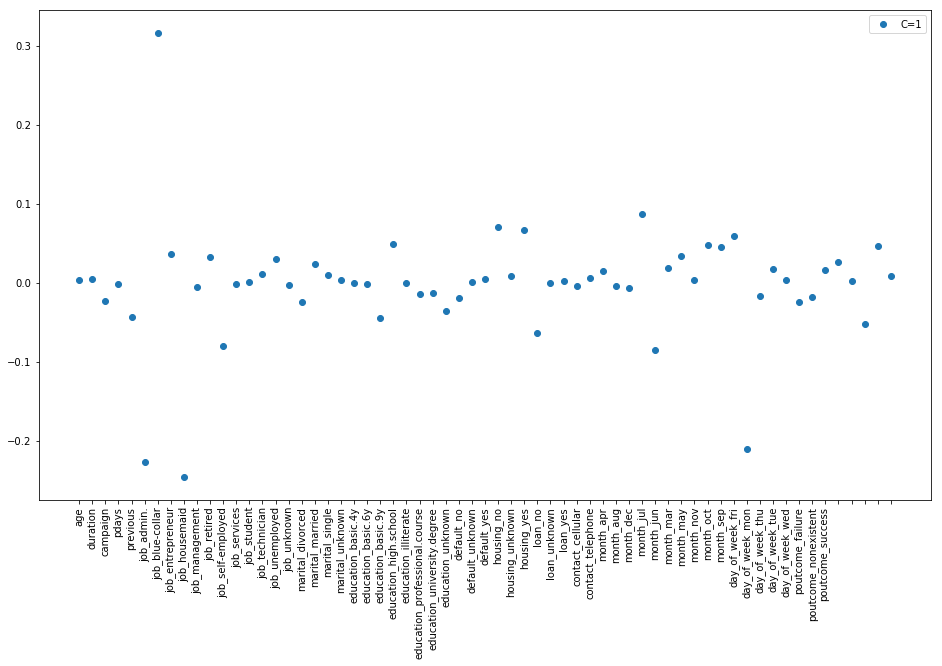

In [238]:
plt.figure(figsize=(16,9))

plt.plot(logisticregression_raw.coef_.T, 'o', label="C=1")
plt.xticks(range(X_raw.shape[1]), df_raw_with_dummies.columns, rotation=90)
# plt.ylim(-5, 5)
plt.legend()

# TODO: Match x-axis labels to dataset

### 5. Using the model to predict outcomes based on fresh/unseen data

In [40]:
# Using our trained model to predict whether y will be 1 or 0

sample_input = X_test[0]

# Using .predict_proba() .predict_proba() returns the probability of the sample for each class in the model, where classes are ordered as 
# they are in self.classes_.
print(logisticregression.predict_proba(sample_input))


# Using .predict()  This returns the class label (i.e. whether the prediction is 0 or 1)
print(logisticregression.predict(sample_input))


[[ 0.90609139  0.09390861]]
[0]


/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [41]:
# Using our trained model to predict whether y will be 1 or 0

sample_input_2 = X_test[2]

# Using .predict_proba() .predict_proba() returns the probability of the sample for each class in the model, where classes are ordered as 
# they are in self.classes_.
print(logisticregression.predict_proba(sample_input_2))


# Using .predict()  This returns the class label (i.e. whether the prediction is 0 or 1)
print(logisticregression.predict(sample_input_2))


[[ 0.24718234  0.75281766]]
[1]


/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=uint8)

In [42]:
from sklearn.linear_model import LogisticRegressionCV

In [159]:
logisticregressionCV = LogisticRegressionCV().fit(X_train, y_train)
print("training set score: %f" % logisticregressionCV.score(X_train, y_train))
print("test set score: %f" % logisticregressionCV.score(X_test, y_test))

training set score: 0.900245
test set score: 0.900026


In [160]:
logisticregression_auto_weighted = LogisticRegression(class_weight='auto').fit(X_train, y_train)
print("training set score: %f" % logisticregression_auto_weighted.score(X_train, y_train))
print("test set score: %f" % logisticregression_auto_weighted.score(X_test, y_test))

/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


training set score: 0.853013
test set score: 0.843611


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("training set score: %f" % rfc.score(X_train, y_train))
print("test set score: %f" % rfc.score(X_test, y_test))

/Users/davidtan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


training set score: 0.992915
test set score: 0.894647


In [157]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1, max_leaf_nodes=50)
gbc.fit(X_train, y_train)
print("training set score: %f" % rfc.score(X_train, y_train))
print("test set score: %f" % rfc.score(X_test, y_test))

training set score: 0.992478
test set score: 0.902125
